# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Adrian Vega

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [14]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import json
import html5lib
import matplotlib.pyplot as plt
from spacytextblob.spacytextblob import SpacyTextBlob

!pip list

print('All prereqs installed.')

Package                   Version
------------------------- --------------
annotated-types           0.7.0
anyio                     4.6.2.post1
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 3.0.0
async-lru                 2.0.4
attrs                     24.2.0
babel                     2.16.0
beautifulsoup4            4.12.3
bleach                    6.2.0
blis                      1.0.1
catalogue                 2.0.10
certifi                   2024.8.30
cffi                      1.17.1
charset-normalizer        3.4.0
click                     8.1.7
cloudpathlib              0.20.0
colorama                  0.4.6
comm                      0.2.2
confection                0.1.5
contourpy                 1.3.1
cycler                    0.12.1
cymem                     2.0.10
debugpy                   1.8.9
decorator                 5.1.1
defusedxml                0.7.1
en_core_web_sm            3.8.0
executing

## Question 1
Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [2]:
# Import libraries

import requests # Library to make HTTP requests for websites
import pickle # Library used to save and load Python objects such as strings and dictionaries by serializing and deserializing

# Request and Store Response
endo_page = requests.get('https://medicine.yale.edu/news/yale-medicine-magazine/article/endometriosis/')
endo_html = endo_page.text

# Use Pickle library to serialize the hackaday_html string and store in file hackaday.pkl
# The serialized file can later be retrieved and used without requesting from url
with open('endometriosis.pkl', 'wb') as file:
    pickle.dump(endo_page.text,file)
print('Article HTML save to endometriosis.pkl')


Article HTML save to endometriosis.pkl


## Question 2
Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

### Read in Article HTML Source

In [15]:
import pickle
from bs4 import BeautifulSoup

# Load the HTML content from the pickle file
with open('endometriosis.pkl', 'rb') as file:
    endo_html = pickle.load(file)

# Use BeautifulSoup to parse the HTML
parser = 'html.parser'
soup = BeautifulSoup(endo_html, parser)

article_text = soup.find('article')

# Extract text only from the article
if article_text:
    text = article_text.get_text(separator="\n", strip=True)
else:
    text = soup.get_text(separator="\n", strip=True) 

print(text)


Endometriosis
Yale Medicine Magazine
,
Spring 2024 (Issue 172) Women's Health Special Report
by
Isabella Backman
Contents
Features
From hysteria to empowerment
Heart disease in women
Breast cancer research
Endometriosis
Why pregnancies fail
The power of collaboration
Digital pathology
Yale researchers hailed as STAT 'Wunderkinds'
News
Letters
From the journals
Mazure chairs new White House initiative
People
Serendipity in action
On a mission
Dialogue
Women's health: challenges and opportunities
The evolution of psychiatry
Changing the trajectory of a painful systemic disease.
Endometriosis: more than chronic pelvic pain
Researchers estimate that over 10% of all women of childbearing age live with this condition.
Photo
by
Codex Anatomicus
Even though endometriosis—a condition in which tissue similar to that lining the uterus grows outside the uterus—is among the most common gynecological conditions, it remains one of the most misunderstood and misdiagnosed.
Time and again, as far back a

### Print Polarity and Total Sentences

In [18]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Add SpacyTextBlob to the pipeline
nlp.add_pipe('spacytextblob')

# Process the text using SpaCy and print polarity
doc = nlp(text)
polarity = doc._.blob.polarity
print(f'The polarity score of this article is {polarity:.3f}!')

sentences = len(list(doc.sents))
print(f'The total number of sentences is {sentences}!')

The polarity score of this article is 0.004!
The total number of sentences is 114!


## Question 3
Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [20]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from collections import Counter

# Load the spaCy model en_core_web_sm
nlp = spacy.load('en_core_web_sm')

# Process the article text(article_text contains soup.get_text()) using the spacy pipeline
doc = nlp(text)

# Filter out or remove stopwords, punctuation, and whitespace
# Convert tokens to lowercase

filtered_token = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]

# Get the frequency of each token and use .most_common function to return most common with argument of 5
token_frequencies = Counter(filtered_token).most_common(5)

# Print the common tokens with their frequencies
print("Most frequent tokens and the frequency of each:")
for token, count in token_frequencies:
    print(f"Token: '{token}', Count: {count}")

Most frequent tokens and the frequency of each:
Token: 'endometriosis', Count: 52
Token: 'disease', Count: 27
Token: 'pain', Count: 26
Token: 'women', Count: 23
Token: 'taylor', Count: 23


## Question 4
Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [22]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from collections import Counter

# Load the spaCy model en_core_web_sm
nlp = spacy.load('en_core_web_sm')

# Process the article text(article_text contains soup.get_text()) using the spacy pipeline
doc = nlp(text)

# Filter out punctuation, stopwords, and whitespace and get the lemmas form of each token
filtered_lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space]

# Get the frequency of each lemma and return the 5 most common
lem_frequency = Counter(filtered_lemmas).most_common(5)

# Print the common lemmas with their frequencies
print("Most frequent lemmas and the frequency of each:")
for lemma, count in lem_frequency:
    print(f"Lemma: '{lemma}', Count: {count}")

Most frequent lemmas and the frequency of each:
Lemma: 'endometriosis', Count: 52
Lemma: 'disease', Count: 27
Lemma: 'pain', Count: 26
Lemma: 'woman', Count: 24
Lemma: 'taylor', Count: 23


## Question 5
Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

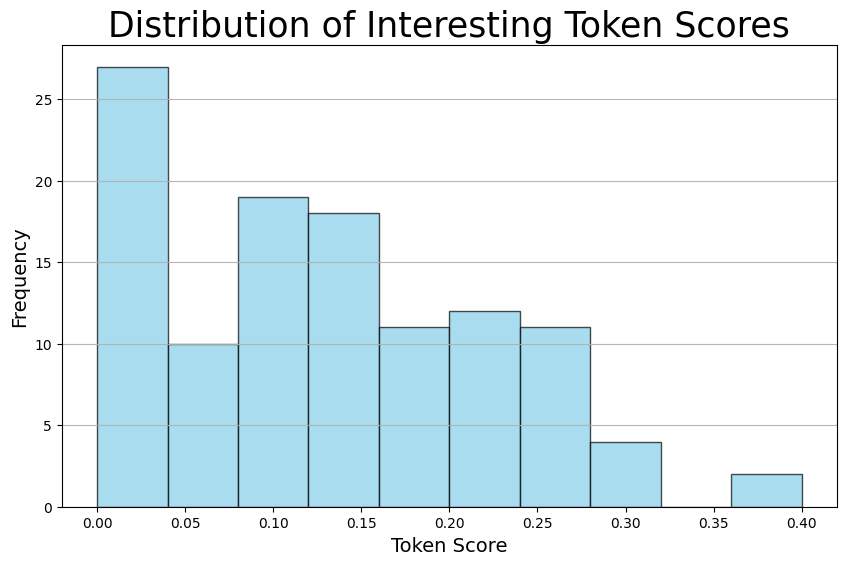

In [ ]:
# Define the score_sentence_by_token method
def score_sentence_by_token(sentence, interesting_token):
    # Filter tokens and remove punctuation, stopwords, and spaces
    filtered_tokens = [token.text.lower() for token in sentence if not token.is_punct and not token.is_stop and not token.is_space]
    # Count the interesting tokens in the sentence
    token_count = sum(1 for token in filtered_tokens if token in interesting_token)
    # Return the score/ratio of interesting tokens to total words in sentence
    token_score = token_count/len(filtered_tokens)
    return token_score

interesting_tokens = [token for token, x in token_frequencies]

# Create an empty list to add scores of each sentence
token_scores = []

# Loop through each sentence in the article and calculate it's score then append
for sentence in doc.sents:
    token_score = score_sentence_by_token(sentence, interesting_tokens)
    token_scores.append(token_score)

# Plot the histogram of token scores
plt.figure(figsize=(10, 6))
plt.hist(token_scores, bins=10, edgecolor='black', color='skyblue', alpha =0.7)

# Add titles and labels to the plot and add grid lines
plt.title('Distribution of Interesting Token Scores', fontsize=25)
plt.xlabel('Token Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha = 0.9) 

# Show the plot
plt.show()

# The most common range of token scores is around 0.00 to 0.04 based on the histogram.

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

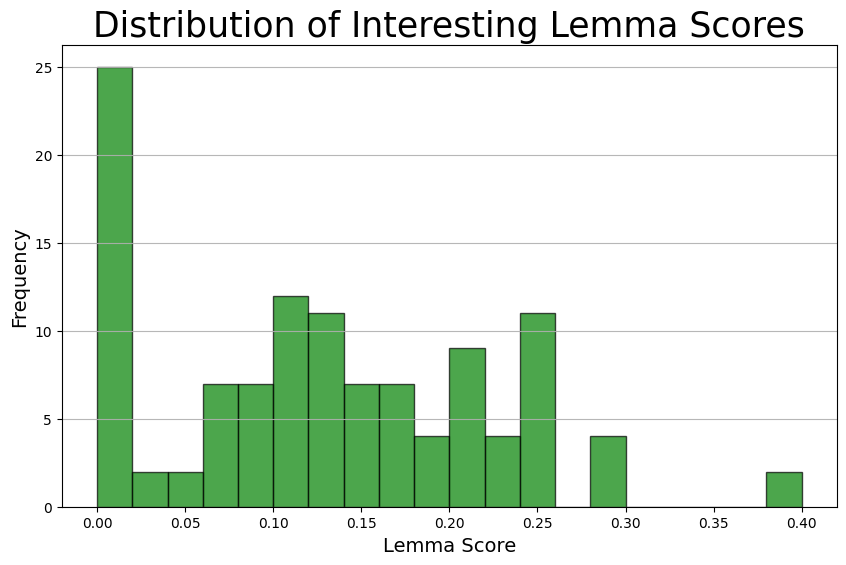

In [ ]:
# Define the score_sentence_by_lemma method
def score_sentence_by_lemma(sentence, interesting_lemmas):
    # Filter tokens and get lemmas
    filtered_lemmas = [token.lemma_.lower() for token in sentence if not token.is_punct and not token.is_stop and not token.is_space]
    # Count how many interesting lemmas appear in the sentence
    lemma_count = sum(1 for lemma in filtered_lemmas if lemma in interesting_lemmas)
    # Return the score/ratio of interesting lemmas to total words in sentence
    lemma_score = lemma_count/len(filtered_lemmas)
    return lemma_score

interesting_lemmas = [lemma for lemma, x in lem_frequency]

# Create an empty list to add scores of each sentence
lemma_scores = []

# Loop through each sentence in the article and calculate it's score then append
for sentence in doc.sents:
    lemma_score = score_sentence_by_lemma(sentence, interesting_lemmas)
    lemma_scores.append(lemma_score)

# Plot the histogram of token scores
plt.figure(figsize=(10, 6))
plt.hist(lemma_scores, bins=20, edgecolor='black', color='green', alpha =0.7)

# Add titles and labels to the plot and add grid lines
plt.title('Distribution of Interesting Lemma Scores', fontsize=25)
plt.xlabel('Lemma Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha = 0.9) 

# Show the plot
plt.show()

# The most common range of lemma scores is around 0.00 to 0.02 based on the histogram.

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?